# Diabetes Classification

## Team
* Weihua Wu

### Course: CISB 60 – ML and DL (Fall, 2024)

## Project Description

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Glucose is your body’s main source of energy. Your body can make glucose, but glucose also comes from the food you eat. The type of diabetes includes type 1, type 2, and gestational diabetes.[5]
<div>
<img src="image1.png" width="500"/>
</div>

Diabetes is a very common health issues in the world because it can cause many effects in human body. For example, diabetes can lead to ogran damage, such as heart attack, storke, etc. It also can create foot problem, which could lead to amputation [10]. More than 133 million Americans have diabetes or prediabetes[6]. As of 2019, 37.3 million people—or 11.3% of the U.S. population—had diabetes.1 More than 1 in 4 people over the age of 65 had diabetes. Nearly 1 in 4 adults with diabetes didn’t know they had the disease[7]. About 90% to 95% of diabetes cases are type 2 diabetes[8]. In 2019, 96 million adults—38% of U.S. adults—had prediabetes[9]. Thus, understanding diabetes and diabetes prevention are very important in this modern society.

**Data Description**
This dataset comes from the National Institute of Diabetes and Digestive and Kidney Diseases according to the creator of the dataset. The dataset was downloaded from Canvas of the course CISB-60. The orginal dataset could be also found in Kaggle website with the link: https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data. The instances of the dataset includes pregnancies, glucose, blood pressure, skin thinkcness, inulin, BMI, Diabetes Pediagree Function, ages, and outcome.

The explanantion of the instances:

* pregnancies: number of time pregnant
* Glucose: plasma blucose concentration at 3 hours in an oral glucose tolerace test (mg/dL)
* BloodPressure: Diastolic blood pressure (mm Hg) - pressure in your arteries when your heart relaxes and fills with blood
* SkinThickness: Tricepts skin fold thinkness (mm) - measurement of the amount of skin and subcutaneous fat on the back of the upper arm
* Insulin: 2-Hours serum insulin (mu U/ml) - measurment of free insulin in a person's body
* BMI: Body mass index (Weight in kg / (height in m)^2)
* Diabetes Pediagreee Function: Diabetes pediagree function - a function that scores the probability of diabetes based on family history
* Age : age (years)
* Outcome: Diabetes (Yes = 1, No = 0)

This objective of the project is to perform classification of diabetes using various supervised learning method, logistics regression, KNN, Random Forest, and deep learning method, ANN and determine the best method using the accuracy metric.



**Keywords:** Diabetes, Machine Learning , Deep Learning, Hyperparameter Tuning, ROC/AUC Cruve.

### Ignore Warning 

In [371]:
# Ignore warnings in Jupyter
import warnings
warnings.filterwarnings('ignore')

## Required packages

* Load the required packages or libraries
* Libraries includes pandas, numpy, matplotlib, seaborn, sklearn, keras, tensorfow


In [372]:
# Import the required libraries
import pandas as pd
import numpy as np

# Import the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Machine Learning libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

## Deep learning
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential
import tensorflow as tf


## Exploratory Data Analysis (EDA)

## Import Dataset

In [373]:
# Import dataset
df = pd.read_csv('DataSets/diabetes.csv')

### Display the first 5 rows of the datast

In [374]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check the dimension of the dataset

In [375]:
print(df.shape)

(768, 9)


There are 9 instances (columns) and 768 observations (rows) in this dataset.

### Check the description of the dataset

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


According to the output, there is no missing value in this dataset. The names of the instance of this dataset are Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome. The data type of instance is numeric (either 7 int or 1 float).

### Create Descriptive Stattistcs

* Count:
* Mean:
* Std:
* Min
* Max
* 25%
* 50%
* 75%:


In [377]:
# create statistical summary of the dataset (mainly for numeric variables)
print("The staistical summary table for the independent variables: \n")
df.iloc[:, :-1].describe()

The staistical summary table for the independent variables: 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Sample Interpretation:

* The above output shows that all instance have 768 observation. For illustration purpose, the vairable pregnancies is selected to explain the statistical summary. The minimun and maximum number of pregnancies are 0 and 17 respectively. On average, there are about 4 number of preganancies. the 25% qualtile of the number of pregnacies is 1, and 75% quantile of pregnancies is 6. The 50% quantile of the number of pregnancies is 3.  

### Display the distribution of each variables in the dataset

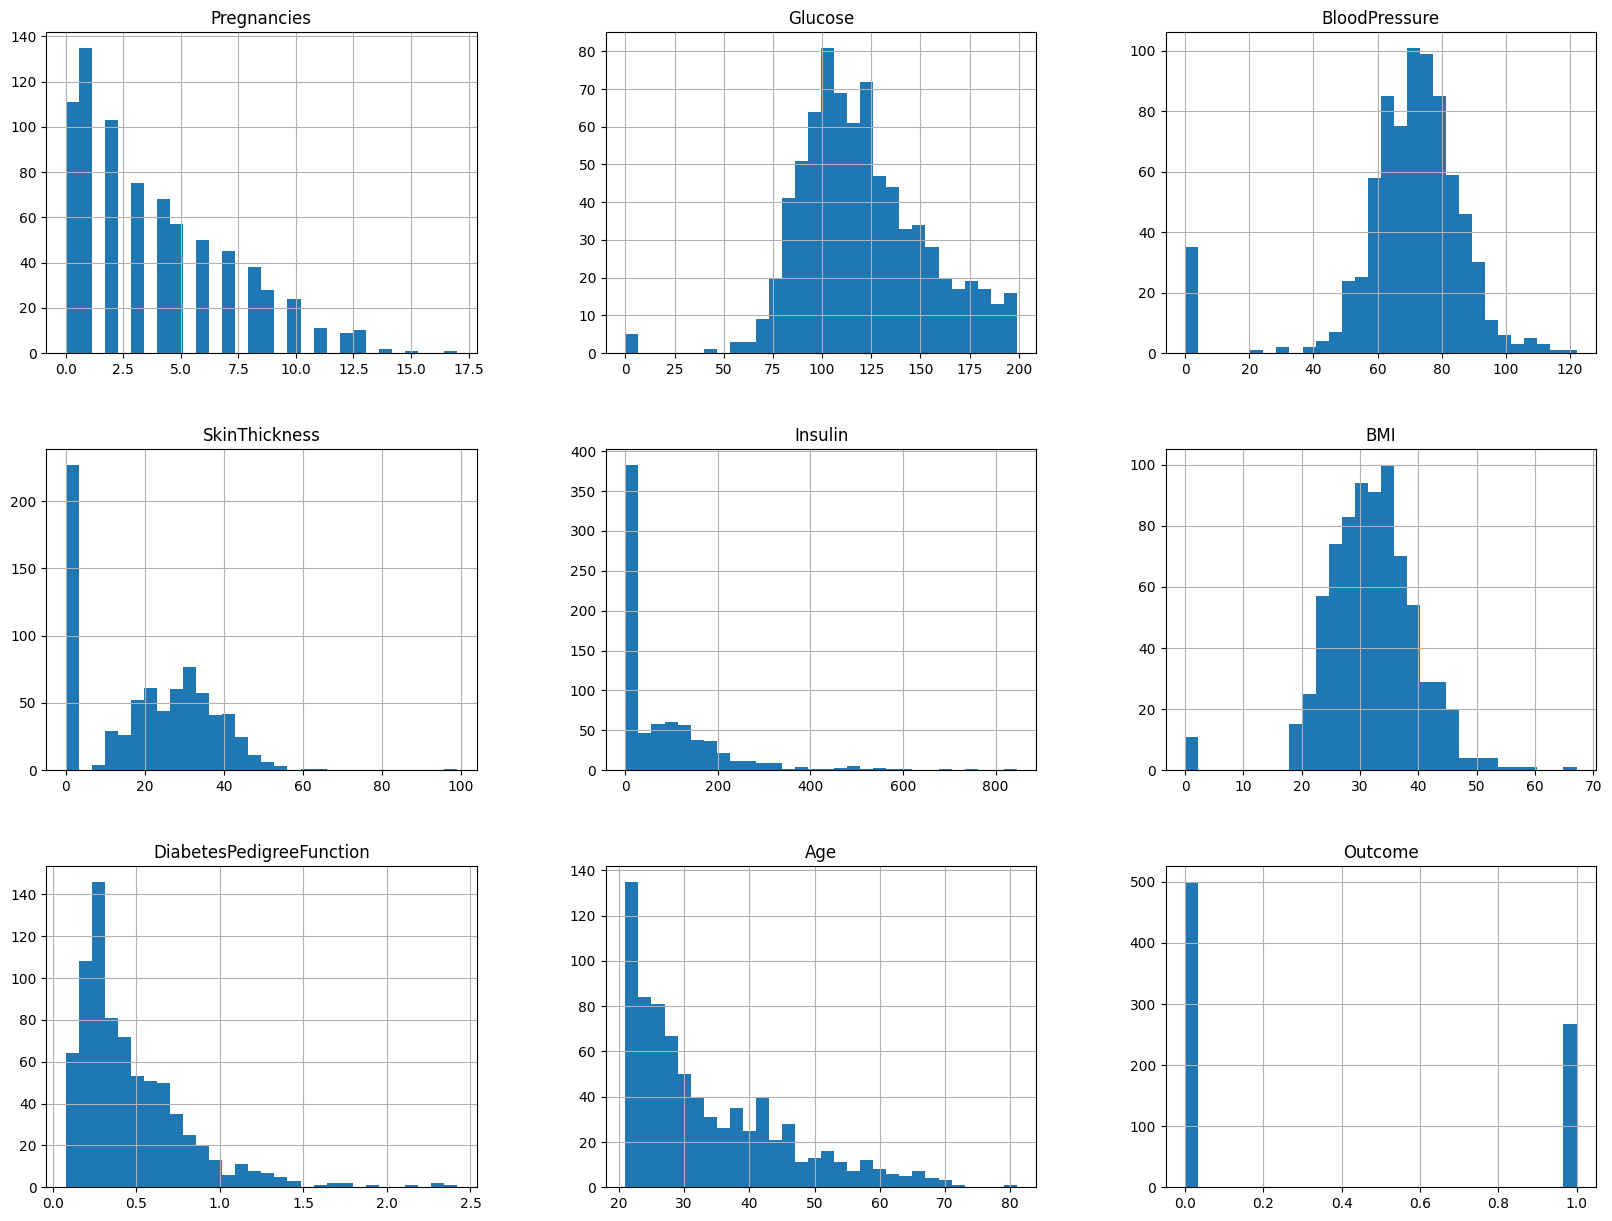

In [378]:
df.hist(bins=30, figsize=(20,15))
plt.show()

The above plots shows the distribution of all the instance in the dataset. Although there are no missing value in this dataset, Those missing value could be replaced by 0 for some instances. For example, glucose concentration, blood pressure, skin thickness, Insulin, and BMI reading. Blood pressure is a read about the pressure in the arteries when the heart relaxes and fills with blood. It is not possible the blood pressure is 0 for a human. Thus, those instances are possible a missing value but filled with 0 values. In the next section, those 0 value will be replace with NA values. 

### Replace 0 value into NA value

* Display the name of each column

In [379]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


* Replace values of 0 in the 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' variables

In [380]:
# List of numerical columns
bsmt_num_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[bsmt_num_cols] = df[bsmt_num_cols].replace(0, np.nan)

* Impuatation with the mean by Outcome for Glucose, blood pressure, skin thickness, insulin, and BMI

In [381]:
# Calculate the mean of Glucose and Impute with it
mean_glucose_by_outcome = df.groupby('Outcome')['Glucose'].transform('mean')
df['Glucose'] = df['Glucose'].fillna(mean_glucose_by_outcome)

# Calculate the mean of BloodPressure and Impute with it
mean_BloodPressure_by_outcome = df.groupby('Outcome')['BloodPressure'].transform('mean')
df['BloodPressure'] = df['BloodPressure'].fillna(mean_BloodPressure_by_outcome)

# Calculate the mean of SkinThickness and Impute with it
mean_Skinthickness_by_outcome = df.groupby('Outcome')['SkinThickness'].transform('mean')
df['SkinThickness'] = df['SkinThickness'].fillna(mean_Skinthickness_by_outcome)

# Calculate the mean of Insulin and Impute with it
mean_Insulin_by_outcome = df.groupby('Outcome')['Insulin'].transform('mean')
df['Insulin'] = df['Insulin'].fillna(mean_Insulin_by_outcome)

# Calculate the mean of Insulin and Impute with it
mean_BMI_by_outcome = df.groupby('Outcome')['BMI'].transform('mean')
df['BMI'] = df['BMI'].fillna(mean_Insulin_by_outcome)

## Display the distribution of each variable again

* The purpose is to check if there is anything wrong with imputation. 
* All the 0 values in the Glucose, blood pressure, skin thickness, insulin, and BMI should be replaced by their mean.

 mean.

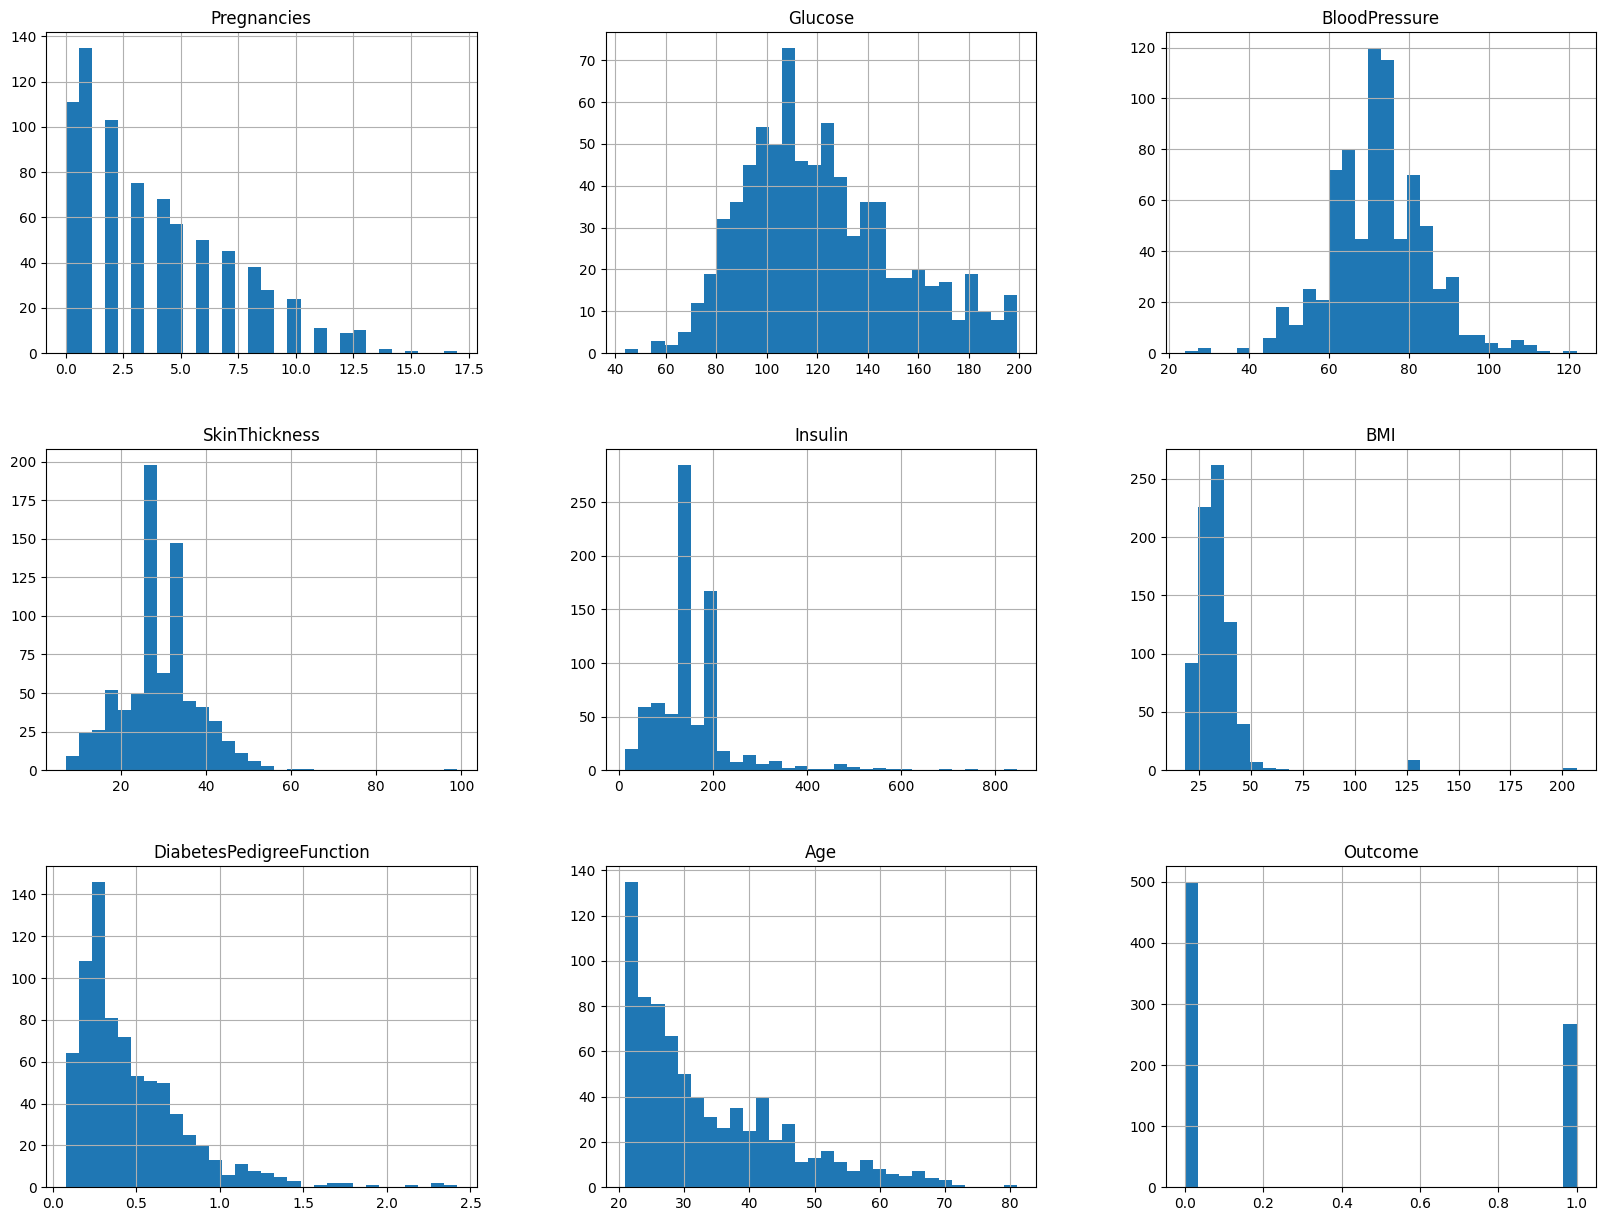

In [382]:
df.hist(bins=30, figsize=(20,15))
plt.show()

### Display the frequency and distribution of the outcome variable

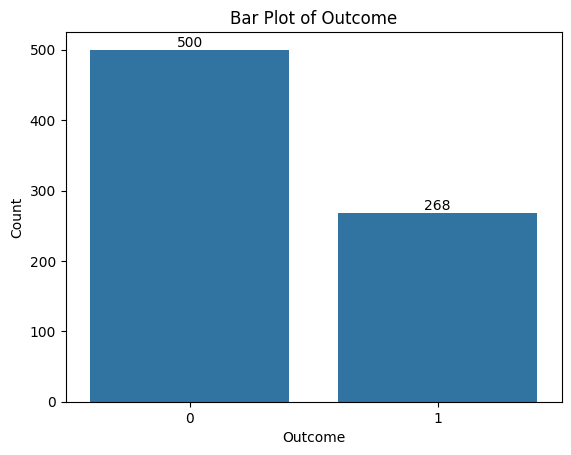

In [383]:
ax = sns.countplot(x='Outcome', data=df)
ax.bar_label(ax.containers[0])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Bar Plot of Outcome')
plt.show()

In the outcome variable, There are 500 was labeled as 0 and 268 label as 1. 

## Correlation Diagram

* The correlation diagram shows the correlation relationship between independent variables, as well the relationship between the independent variables and the outcome variable.
* The purpose of the correlation diagram is to see if there is colinearlity within variables.
* The correlation is range from -1 to 1.
* -1 = perfect negative correlation
* -.7 = strong negative correlation
* -.5 = moderate negative correlation
* -.3 = weak negative correlation
* 0 = no correlation
* .3 = weak positive correlation
* .5 = moderate positive correlation
* .7 = strong positive correlation
*  1 = perfect positive correlation


<Axes: >

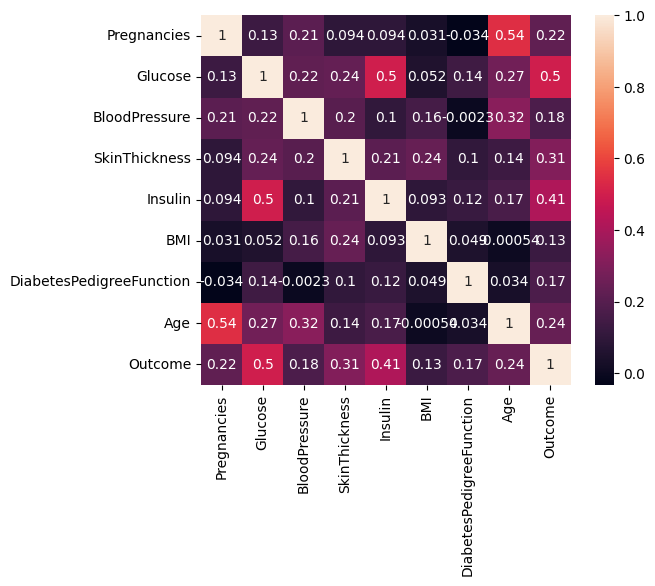

In [384]:
# Correlation Heatamp for the variable in this dataset
sns.heatmap(df.corr(),annot=True, square=True)

* The diagram above shows that all variable has either weak or moderate. For example, age variable is moderate positive correlated to the pregnancies variable.

## Methodology

1. Explan your ML and DL metodology
 * Machine learning is a subfield of artificial intelligence, which is broadly defined as the capability of a machine to imitate intelligent human behavior [2]. There are three main type of learning in machine learning, supervised learning, unsupervised learning, and reinforcement learning. Supervised learing is the type of machine learning that will be used for this project because supervised learning describes a class of problem of predicting labels by given input features. Supervised learnig perform classfiication tasks which involve predicint  a class lable. In supervised learning, many different kind of algorithms can be applied to various topic of the dataset. In this project, the supervised learning methods that were used are K-Nearest Neighbors (KNN), Logistic Regression, and Random Forest. 
 * Deep learning is a branch of machine learning based on a set of algorithms that attempt to model high-level abstractions in data by using multiple processing layers, with complex structures or otherwise, composed of multiple non-linear transformations. Artificial neural networks (ANN) is one of the deep learning method can perform classification on the given dataset. An artificial neuron network (ANN) is a computing system patterned after the operation of neurons in the human brain [3]. 


2. Models Ultilization
 * Supervised Learning Models
    * Logistic Regression is a data analysis technique that uses mathematics to find the relationships for a binary dependent variable, a  variable has two possible outcomes or classes (e.g., 0 or 1, Yes or No, True or False). It works similar to linear regression, but with a binary or multiple factor response variable. 
    * Random Forest is a collection of many decision trees in supervised learning. In random forest classification model, instances from the original dataset are randomly selected using boostrapping or ramdom sampling with replacement method to create samples. Those samples is used to fit a classification tree. Each classification tree is grown using a random sample of features. Prediction for new instance are made by applying each classification tree in the random forest. In the final prediction, a class with majority of votes will be classified.
    * KNN is a supervised learning algorithm that predicts the output feature of a new instance using other instances that are close for certain input feature. A value of ***k** is selexted and the k istances with the closet input feature are found. The output features of those k instance are sued to make prediction [4].

 
 * Deep Learning Model 
    * Deep Learning (ANN) is a neural netwroks that contains input layers, hidden layers, and output layers. Each layer has a collection of neurons, and the neurons in one layer interact with all the neurons in the other layers. The input layer is where we feed input to the network. The number of neurons in the input layer is the number of inputs we feed to the network. Any layer between the input layer and the output layer is called a hidden layer. It processes the input received from the input layer. The hidden layer is responsible for deriving complex relationships between input and output. After processing the input, the hidden layer sends its result to the output layer. The output layer emits the output. In this project, it is a binary classification, then the number of neurons in the output layer is one that tells us which class the input belongs to. Activation function also known as a transfer function, plays a vital role in neural networks. The aim of the activation function is to introduce a non-linear transformation to learn the complex underlying patterns in the data. This project involve binary outcome. Thus, the sigmoid function is one of the most commonly used activation functions.

3. Metrics
   * In this project, the aim is to find the best classification method for the diabete dataset. The metric for classification is accuracy. The better the accruacy it is, the better the model was performed for this dataset. 
 

### Machine Learning (Supervised Learning) 

* The outcome (dependent variable)  has coded into 0 and 1. Thus, dummy code is not needed. 
* The code below will split the dataset into training (80%) and testing set (20%).
* Training set will be standardized before apply supervised learning method for classification.
* The optimal parameter for these supervised learning will be evalute. 
* The evalue paramters of each supervised learning model will be used for Cross Validate to prevent overfitting.
* The mean of the accuracy of each model would be obtained and compared.


In [385]:
# Split data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Logisitic regression

In [386]:
# Logistic Regression Model
log_model = LogisticRegression(max_iter=10000)
# fit the model
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [387]:
from sklearn import metrics
# Confusion Matrix for Logistic Regression

# Predicting on test data
y_pred_log = log_model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_log)
cnf_matrix

array([[85, 14],
       [16, 39]])

Text(0.5, 427.9555555555555, 'Predicted label')

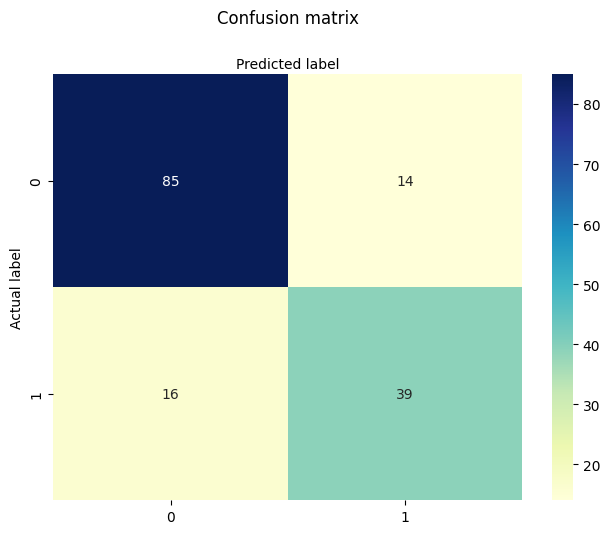

In [388]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The confusion matrix above shows the model classified 85 people who do not have diabete and 39 people who do have diabete correctly. The model misclassified 14 people have diabete but they actually do not. It also misclassified 16 people who do not diabete but they actully did.

#### Random Forest 

* Grid method to find the max features and number of estimators for random forest method

In [389]:
from sklearn.model_selection import GridSearchCV

n_estimators =[10,50,100,200]
max_features =[2,3,4]
bootstrap = [True, False]
oob_score = [True, False]

param_grid= {'n_estimators': n_estimators,
             'max_features': max_features,
             'bootstrap' : bootstrap,
             'oob_score' : oob_score}


In [390]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [391]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [10, 50, 100, 200],
                         'oob_score': [True, False]})

In [392]:
grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 100, 'oob_score': False}

* fiting the model and find the accuracy

In [393]:
# Model 2: Random Forest Classifier
#rf_model = RandomForestClassifier(n_estimators=100,max_features= 4, oob_score= False,  random_state=42)
#rf_model.fit(X_train, y_train)

# Predicting on test data
#y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix for Random Forest
#print("Confusion Matrix (Random Forest):")
#print(confusion_matrix(y_test, y_pred_rf))

# Binary Classification Metrics
#print(f"Accuracy (Random Forest): {accuracy_score(y_test, y_pred_rf)}")

#### K-Nearest Neighbors Model
* Find the best value of K for KNN

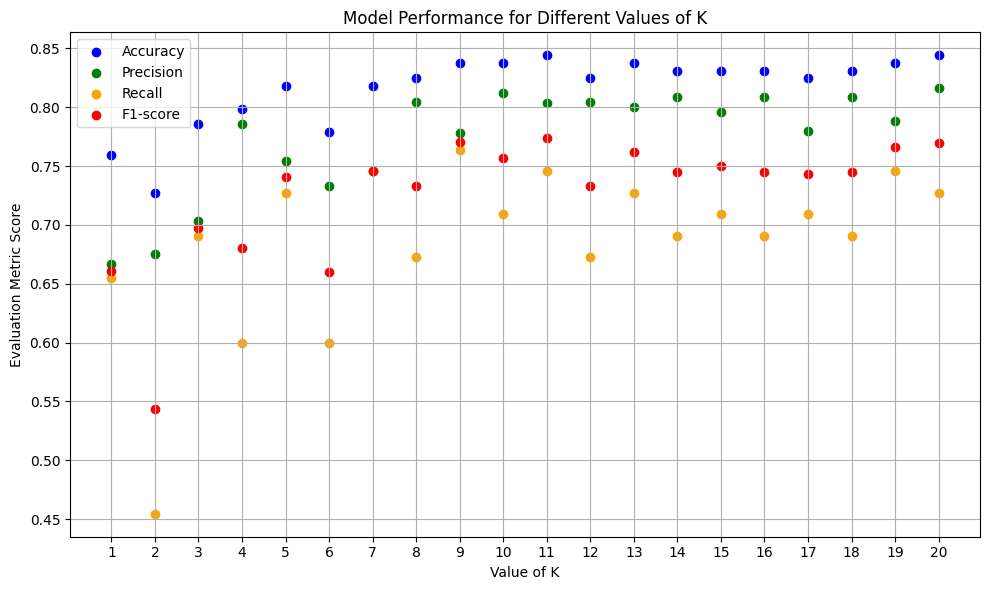

In [394]:
# Lists to store evaluation metric scores for different values of K
#Initialization: It initializes empty lists (K_values, accuracy_scores, precision_scores, 
# recall_scores, and f1_scores) to store evaluation metric scores for different values of K.
K_values = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Try different values of K and evaluate the model
# Loop over Different Values of K
for k in range(1, 21):
    # Create KNN classifier
    # It creates a K-nearest neighbors (KNN) classifier with the current value of K.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    # The classifier is trained using the scaled training data (X_train_scaled, y_train).
    knn.fit(X_train, y_train)

    # Predict on the test data
    # Predictions are made on the scaled test data (X_test_scaled) using the trained model.
    y_pred = knn.predict(X_test)

    # Evaluate the model
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)

    # Extracting evaluation metric scores
    # The model's performance is evaluated using various evaluation metrics:
    accuracy_scores.append(cr['accuracy'])
    precision_scores.append(cr['1']['precision'])
    recall_scores.append(cr['1']['recall'])
    f1_scores.append(cr['1']['f1-score'])
    K_values.append(k)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for accuracy
plt.scatter(K_values, accuracy_scores, label='Accuracy', color='blue')

# Scatter plot for precision
plt.scatter(K_values, precision_scores, label='Precision', color='green')

# Scatter plot for recall
plt.scatter(K_values, recall_scores, label='Recall', color='orange')

# Scatter plot for F1-score
plt.scatter(K_values, f1_scores, label='F1-score', color='red')

# Adding labels and title
plt.title('Model Performance for Different Values of K')
plt.xlabel('Value of K')
plt.ylabel('Evaluation Metric Score')
plt.legend()
plt.grid(True)
plt.xticks(K_values)
plt.tight_layout()

# Show plot
plt.show()


The optimal k value is 11 according to the plot above.

##  Cross-Validation for Logistic Regression, KNN, and Random Forest
* The cross valudiation method obtained the mean of accuracy of each supervised learning. 

In [395]:
# Initialize models
log_model = LogisticRegression(max_iter=10000,  random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_features=3, oob_score= False,  random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=11)

# define the number of folds
k_folds = 5
# Cross-validation for each model
print("Cross-Validation Scores:")

# Decision Tree Cross-Validation
log_cv_scores = cross_val_score(log_model, X, y, cv=k_folds)
print(f"Logistic Regression: Mean Accuracy: {log_cv_scores.mean():.2f}, Standard Deviation: {log_cv_scores.std():.2f}")

# Random Forest Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=k_folds)
print(f"Random Forest: Mean Accuracy: {rf_cv_scores.mean():.2f}, Standard Deviation: {rf_cv_scores.std():.2f}")


# K-Nearest Neighbors Cross-Validation
knn_cv_scores = cross_val_score(knn_model, X, y, cv=k_folds)
print(f"K-Nearest Neighbors: Mean Accuracy: {knn_cv_scores.mean():.2f}, Standard Deviation: {knn_cv_scores.std():.2f}")


Cross-Validation Scores:
Logistic Regression: Mean Accuracy: 0.80, Standard Deviation: 0.02
Random Forest: Mean Accuracy: 0.89, Standard Deviation: 0.01
K-Nearest Neighbors: Mean Accuracy: 0.85, Standard Deviation: 0.03


From the output, the mean accuracy of logistic regression, Random Forest, and KNN are 0.8, 0.89, and 0.85 respectively.

### Deep Learning (ANN)

#### Building the ANN model

In [397]:
#model = Sequential()
#model.add(Dense(40, input_dim=8, activation='relu'))
#Dropout(0.2)
#model.add(Dense(20, activation='relu'))
#Dropout(0.1)
#model.add(Dense(1, activation='sigmoid'))

# Build the neural network
annmodel = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape explicitly
    Dense(16, activation='relu'),
    Dropout(0.2),  # Regularization
    Dense(8, activation='relu'),
    Dropout(0.2),  
    Dense(4, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile model
annmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Fit the Model

In [398]:
annmodel.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=8, epochs=50)

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6283 - loss: 0.7007 - val_accuracy: 0.6429 - val_loss: 0.6777
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.6658 - loss: 0.6510 - val_accuracy: 0.6429 - val_loss: 0.6573
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.6600 - loss: 0.6316 - val_accuracy: 0.6429 - val_loss: 0.6173
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.6315 - loss: 0.6193 - val_accuracy: 0.6429 - val_loss: 0.5825
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.6802 - loss: 0.5553 - val_accuracy: 0.6429 - val_loss: 0.5586
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.6440 - loss: 0.5592 - val_accuracy: 0.6429 - val_loss: 0.5430
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.6515 - loss: 0.5449 - val_accuracy: 0.6429 - val_loss: 0.5294
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.6446 - loss: 0.5016 - val_accuracy: 0.64

### Plot the results

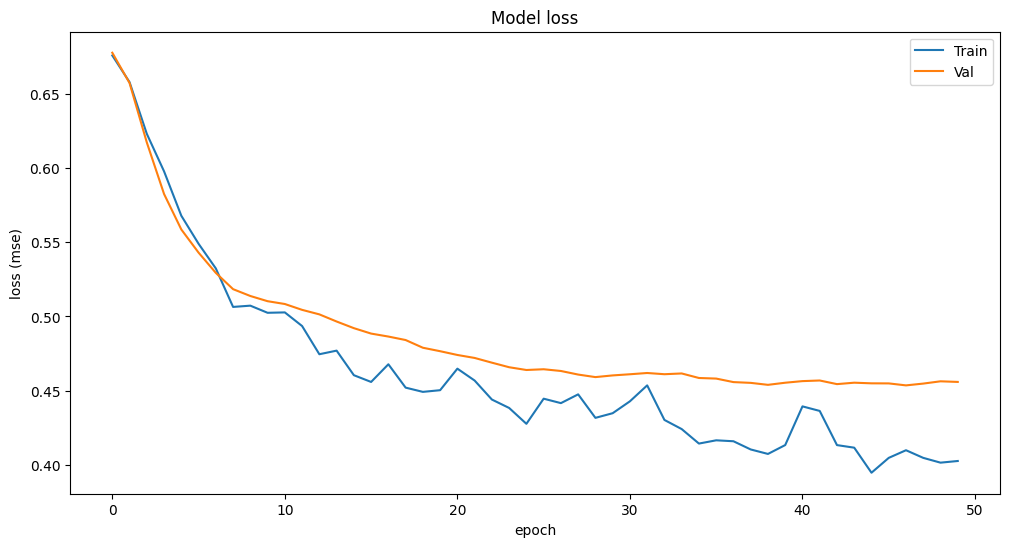

In [399]:
plt.figure(figsize=(12,6))
plt.plot(annmodel.history.history['loss'][:])
plt.plot(annmodel.history.history['val_loss'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Val'], loc='upper right')

### Using Tuning Hyperparameter

* Using tuning Hyperparameter method to increase the accuarcy of the ANN model.

#### Import keras tuner

In [400]:
import keras_tuner as kt 

In [401]:
import os
import shutil

# shutil module is part of the Python standard library and provides a 
# collection of utility functions for working with files and directories. 

folder_path = "my_dir/intro_to_kt/"

# Check if the folder exists before attempting to delete it
if os.path.exists(folder_path):
    # Remove the folder and its contents recursively
    shutil.rmtree(folder_path)
    print(f"The folder '{folder_path}' has been deleted.")
else:
    print(f"The folder '{folder_path}' does not exist.")

The folder 'my_dir/intro_to_kt/' has been deleted.


### Create a function with the model. 
#### Tune the neurons or units with values from 1 to 20 in multiple of 2

In [402]:
def model_builder(hp):
    # create model
    model = Sequential()
    
    hp_units = hp.Int('units', min_value=4, max_value=20, step=4)
    model.add(Dense(units=hp_units, input_dim=8, activation='relu'))
    
    ### add the final layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [403]:
tuner = kt.Hyperband(model_builder, objective='val_accuracy',
                     max_epochs=10, factor=3, 
                     directory='my_dir',
                     project_name='intro_to_kt')

In [404]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [405]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')}.
""")

Trial 5 Complete [00h 00m 01s]
val_accuracy: 0.5934959053993225

Best val_accuracy So Far: 0.6829268336296082
Total elapsed time: 00h 00m 07s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 16.



### Train the model

Find the optimal number of epochs to train the model with the hyperparameters obtained from the search.

In [406]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
tmodel = tuner.hypermodel.build(best_hps)
history = tmodel.fit(X_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3004 - loss: 0.9133 - val_accuracy: 0.3496 - val_loss: 0.8557
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3465 - loss: 0.8353 - val_accuracy: 0.3496 - val_loss: 0.7886
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3625 - loss: 0.7676 - val_accuracy: 0.4146 - val_loss: 0.7327
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4552 - loss: 0.7233 - val_accuracy: 0.5691 - val_loss: 0.6827
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5673 - loss: 0.6776 - val_accuracy: 0.6829 - val_loss: 0.6428
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6793 - loss: 0.6405 - val_accuracy: 0.7317 - val_loss: 0.6079
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7221 - loss: 0.5973 - val_accuracy: 0.7317 - val_loss: 0.5794
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7724 - loss: 0.5539 - val_accuracy: 0.7154 - val_loss:

In [407]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5107 - loss: 0.8001 - val_accuracy: 0.5935 - val_loss: 0.6701
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5873 - loss: 0.7285 - val_accuracy: 0.6748 - val_loss: 0.6403
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6178 - loss: 0.6825 - val_accuracy: 0.6748 - val_loss: 0.6147
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - loss: 0.6658 - val_accuracy: 0.7154 - val_loss: 0.5915
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6692 - loss: 0.6478 - val_accuracy: 0.7398 - val_loss: 0.5708
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7537 - loss: 0.5859 - val_accuracy: 0.7480 - val_loss: 0.5523
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7357 - loss: 0.5886 - val_accuracy: 0.7724 - val_loss: 0.5361
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7423 - loss: 0.5615 - val_accuracy: 0.7724 - val_loss:

#### Evaluate the hyper model

In [408]:
eval_result = hypermodel.evaluate(X_train, y_train)
print("[test loss, test accuracy]:", eval_result)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8190 - loss: 0.4137
[test loss, test accuracy]: [0.3942585289478302, 0.8175895810127258]


### Plot the hyperparameter tuning results

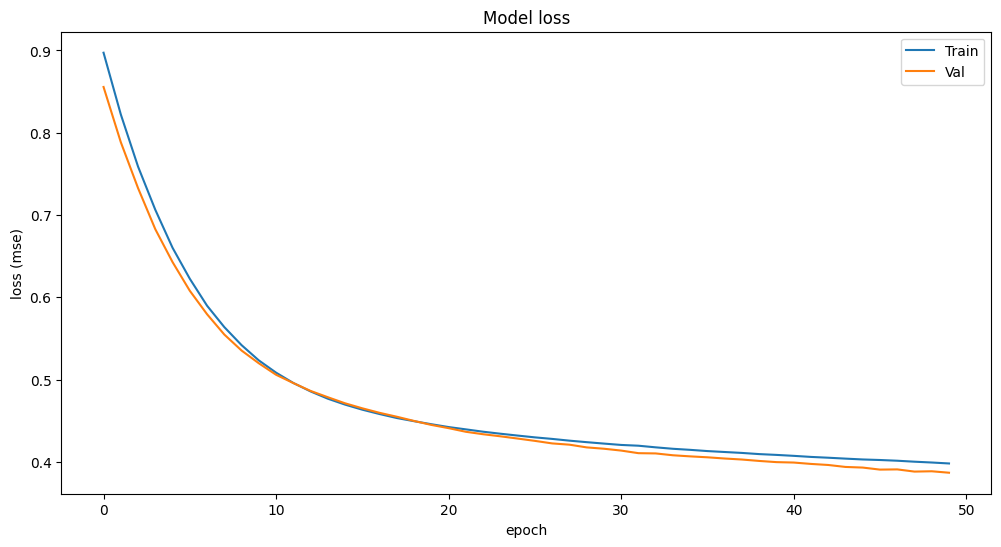

In [409]:
plt.figure(figsize=(12,6))
plt.plot(tmodel.history.history['loss'][:])
plt.plot(tmodel.history.history['val_loss'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Val'], loc='upper right')

### ROC and AUC curve

1. **ROC (Receiver Operating Characteristic) Curve**:
   - The ROC curve is a graphical representation used to evaluate the performance of a binary classification model.
2. **AUC (Area Under the Curve)**:
   - AUC measures the area under the ROC curve and provides a single numeric value that summarizes the model's performance across all threshold settings.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


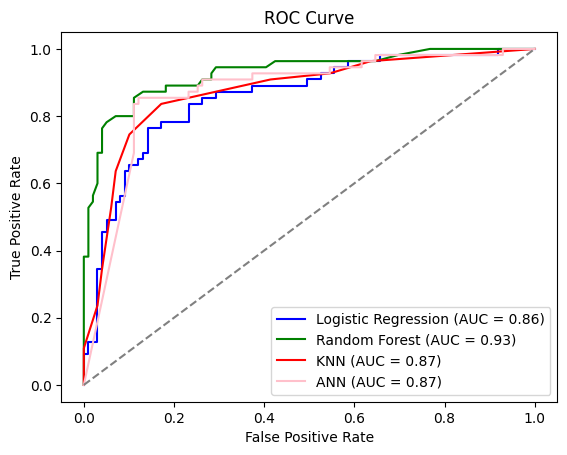

In [412]:
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# ROC Curve and AUC

y_proba_log = log_model.predict_proba(X_test)[:, 1]
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]
y_proba_ann = annmodel.predict(X_test)

fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_proba_ann)

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_ann = auc(fpr_ann, tpr_ann)
# Plotting ROC Curve
plt.figure()
plt.plot(fpr_log, tpr_log, color='blue', label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_ann, tpr_ann, color='pink', label=f'ANN (AUC = {roc_auc_ann:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Results and Conclusions


Table: The accuracy and AUC results of each model.
| Models               | Accuracy | AUC  |
|---------------------|----------|------|
| Logistic Regression | 0.80     | 0.86 | 
| Random Forest       | 0.89     | 0.93 |  
| KNN                 | 0.85     | 0.87 |   
| ANN                 | 0.82     | 0.87 |  

From the able above, the accuracy for logistics regression, random forest, KNN, and ANN are 0.80, 0.89, 0.85, and 0.82. The area under the curve (AUC) value for logistics regression, random forest, KNN, and ANN are 0.86, 0.93, 0.87, and 0.87, respectively. Base on the model accuracy and AUC, random forest performed better comparing to other models in this case. Thus, the best model for classifying diabete of the person is **Random Forest** classification method. 

#### Feature Works

* Removed potential outliers during EDA may lead to better accuracy of each model.
* Performed another impuatation method instead of imputing the mean of each variables.
* Adjust parameter of each machine and deep learning model to obtained better accuracy.
* Applied additional machine learning models to compared, such as support vectors machine (SVM), XGBoost, and etc.

#### Reference

	

[1] https://resources.nu.edu/statsresources/correlation

[2] https://mitsloan.mit.edu/ideas-made-to-matter/machine-learning-explained

[3] https://www.databricks.com/glossary/artificial-neural-network

[4] zyBooks, a Wiley brand. http://www.zybooks.com (accessed 2022).

[5] https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes

[6] National diabetes statistics report, 2022. Centers for Disease Control and Prevention. Updated January 18, 2022. Accessed August 4, 2022. www.cdc.gov/diabetes/php/data-research/ External link

[7] Prevalence of both diagnosed and undiagnosed diabetes. National diabetes statistics report, 2022. Centers for Disease Control and Prevention. Updated September 30, 2022. Accessed November 1, 2022. www.cdc.gov/diabetes/php/data-research/ External link

[8] Methods. National diabetes statistics report, 2022. Centers for Disease Control and Prevention. Updated September 30, 2022. Accessed November 1, 2022. www.cdc.gov/diabetes/php/data-research/methods.html External link

[9] Prevalence of prediabetes among adults. National diabetes statistics report, 2022. Centers for Disease Control and Prevention. Updated September 30, 2022. Accessed November 1, 2022. www.cdc.gov/diabetes/php/data-research/

[10] https://www.who.int/news-room/fact-sheets/detail/diabetes

#### Credits

* All codes is based on the matierals of the couse of CISB 60 – ML and DL (Fall, 2024) created by Professor Angel Martinon Hernandez. 


In [411]:
# End of Project